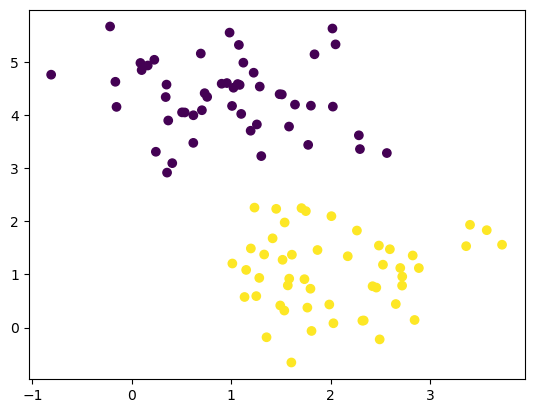

In [3]:
from sklearn.datasets import make_blobs
X_,y=make_blobs(n_samples=100,centers=2,cluster_std=0.7,random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X_[:,0],X_[:,1],c=y) #unscaled

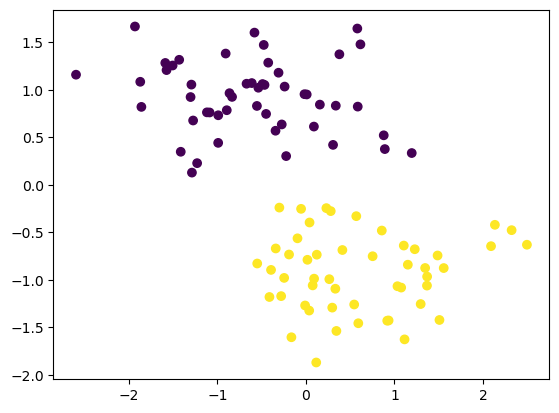

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_)
X=scaler.transform(X_)
#can write in one line
#X = StandardScaler().fit(X_).transform(X_)
plt.scatter(X[:,0],X[:,1],c=y) #scaled

In [6]:
import numpy as np
y = np.where(y==0,-1,1)
y

array([ 1,  1, -1, -1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
       -1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
        1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1])

In [7]:
print(y.shape)
y@y.T

(100,)


100

In [8]:
y = y.reshape((-1,1))
print(y.shape)

(100, 1)


In [9]:
y@y.T

array([[ 1,  1, -1, ...,  1, -1,  1],
       [ 1,  1, -1, ...,  1, -1,  1],
       [-1, -1,  1, ..., -1,  1, -1],
       ...,
       [ 1,  1, -1, ...,  1, -1,  1],
       [-1, -1,  1, ..., -1,  1, -1],
       [ 1,  1, -1, ...,  1, -1,  1]])

In [10]:
#gradient descent method
eta = 0.01
n_samples=X.shape[0]
n_features=X.shape[1]
a=np.random.randn(n_samples)
print(a)
max_step=1e4
step=0
while step<max_step:
    H=(y@y.T)*(X@X.T)
    g=H@a-1
    a_old=a
    a=a-eta*g
    step +=1
    a = np.where(a<0,0,a)
print(a)

[ 2.40349553e+00  3.28727782e-01  5.74905020e-01  1.10726153e+00
 -4.99908369e-01  6.24576059e-01 -9.22862787e-01  1.02247130e-01
  9.02141294e-02  2.23617348e-01  1.87405321e+00  4.05686660e-01
  1.52820865e+00 -1.28434930e+00 -3.10698488e-01 -4.31734123e-01
 -5.44306286e-01 -1.42480715e-01  1.07467961e+00  6.88503338e-01
 -1.45994143e-01  1.26052170e+00  2.20729701e-02 -1.11867764e+00
  8.73575852e-01  4.80237218e-01  1.58751245e+00  1.02727407e+00
 -6.20165699e-02 -1.52251110e+00 -1.81840612e-01 -1.03827721e+00
  2.04481551e+00 -4.35980246e-01 -1.17323745e+00 -9.33504568e-01
  9.10981568e-01 -1.10779489e+00 -8.74210112e-01  1.21965090e+00
  3.73729968e-01  1.53340092e-02  1.90077694e+00 -1.78869559e+00
 -1.00847151e+00 -4.55699658e-01 -1.70826424e+00  7.48028931e-01
  3.23657216e-01 -6.28438232e-02  2.51351943e-01 -2.43672119e-01
 -4.51976562e-01 -5.03692783e-01 -4.74032393e-01  3.58225068e-02
 -2.41656010e+00  1.42874491e-02 -4.70817897e-02  7.80497057e-02
 -1.43773512e+00  8.47315

In [11]:
#support vectors
indices_sv=[i for i in range(n_samples) if a[i]!=0]
print(X[indices_sv])

[[-1.28728016  0.12977411]
 [-0.29978839 -0.23865397]
 [ 1.19506739  0.33578302]]


In [12]:
#update w and b
y = y.reshape(-1)
print(y.shape)

(100,)


In [13]:
w=X.T@(a*y)
print(w)

[ 0.35334694 -4.34836479]


In [14]:
b=1/len(indices_sv)*(X@w-y).sum()
print(b)

-5.921189464667501e-15


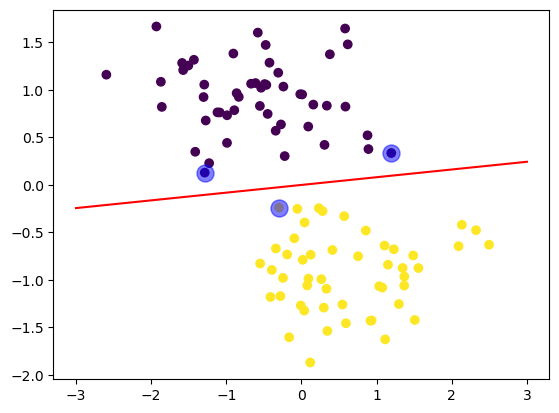

In [15]:
plt.scatter(X[:,0],X[:,1],c=y)
x1=np.linspace(-3,3,100)
x2=-w[0]/w[1]*x1-b/w[1]
plt.plot(x1,x2,'r')
plt.scatter(X[indices_sv,0],X[indices_sv,1],alpha=0.5,c='b',s=150)

Text(0.5, 1.0, 'scaled data')

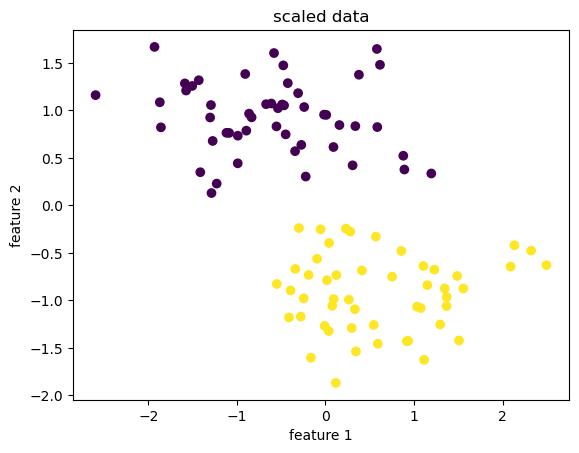

In [16]:
#sklearn svm SVC
from sklearn.datasets import make_blobs
X,y=make_blobs(n_samples=100, n_features=2,centers=2, cluster_std=0.7,random_state=0)
import matplotlib.pyplot as plt

#scale data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X)
X=scale.transform(X)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('scaled data')

In [17]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X,y)

SVC(kernel='linear')

In [18]:
print(svc.coef_)
print(svc.intercept_)

[[ 0.31985337 -2.55291332]]
[-0.02139215]


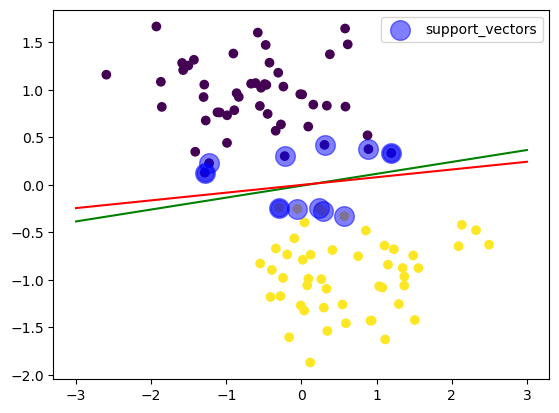

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)
x1=np.linspace(-3,3,100)
x2=-w[0]/w[1]*x1-b/w[1]
x2_sk=-svc.coef_[0][0]/svc.coef_[0][1]*x1-svc.intercept_/svc.coef_[0][1]
plt.plot(x1,x2_sk,'g')
plt.plot(x1,x2,'r')
plt.scatter(X[indices_sv,0],X[indices_sv,1],alpha=0.5,c='b',s=150)
plt.scatter(svc.support_vectors_[:,0],svc.support_vectors_[:,1],alpha=0.5,c='b',s=200, label='support_vectors')
plt.legend()

C:\Users\khadk\AppData\Local\Temp\ipykernel_24824\1810377814.py:38: UserWarning: No contour levels were found within the data range.
  axs[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
C:\Users\khadk\AppData\Local\Temp\ipykernel_24824\1810377814.py:38: UserWarning: No contour levels were found within the data range.
  axs[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
C:\Users\khadk\AppData\Local\Temp\ipykernel_24824\1810377814.py:38: UserWarning: No contour levels were found within the data range.
  axs[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
C:\Users\khadk\AppData\Local\Temp\ipykernel_24824\1810377814.py:38: UserWarning: No contour levels were found within the data range.
  axs[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)
C:\Users\khadk\AppData\Local\Temp\ipykernel_24824\1810377814.py:38: UserWarning: No contour levels were found within the data range.
  axs[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 

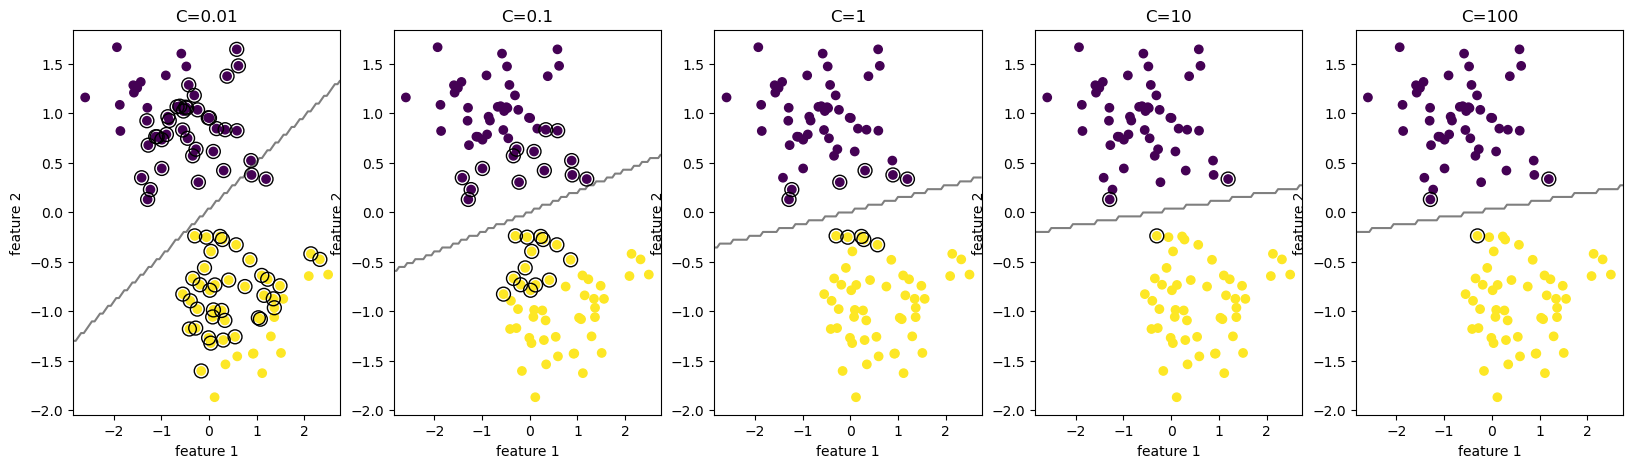

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# generate data
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=0.7, random_state=0)

# scale data
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

# set up the parameter grid for C
C_values = [0.01, 0.1, 1, 10, 100]
fig, axs = plt.subplots(nrows=1, ncols=len(C_values), figsize=(20,5))

# loop through different values of C
for i, C in enumerate(C_values):
    # fit SVM model
    svm = SVC(kernel='linear', C=C)
    svm.fit(X, y)

    # plot data points and decision boundary
    axs[i].scatter(X[:,0], X[:,1], c=y)
    axs[i].set_xlabel('feature 1')
    axs[i].set_ylabel('feature 2')
    axs[i].set_title(f'C={C}')
    xlim = axs[i].get_xlim()
    ylim = axs[i].get_ylim()

    # create a grid of points to plot decision boundary
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axs[i].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5)

    # plot support vectors
    axs[i].scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.show()
